In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr'

import numpy as np 
import musclebeachtools as mbt
import os
import glob
import pandas as pd
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import seaborn as sns
from copy import deepcopy as cdc
import scipy.io as sio
from sys import platform
from datetime import datetime
import datetime as dt
import time
import scipy
import datetime as dt
import plotly
import plotly.graph_objects as go
from matplotlib.animation import FuncAnimation
import math
import sahara_work as saw
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import f1_score,v_measure_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sahara_work as saw
import musclebeachtools as mbt
import numpy as np
import criticality as cr
import powerlaw
import pdb
import numpy as np
from criticality import pvaluenew2 as pv
from criticality import exclude as ex
import matplotlib.pyplot as plt
import seaborn as sns
import os.path as op


plt.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.family':'Arial'})

if platform == 'darwin':
    basedir = 'Volumes'
else:
    basedir = 'media'
    
pth = f'/{basedir}/HlabShare/james/'

savedir = f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/te4_figure_4/'
today = datetime.today().strftime('%Y-%m-%d')

cmap = "YlGnBu"

SAVEFIGS = 1


/hlabhome/wg-mjames/.conda/envs/james_test/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/hlabhome/wg-mjames/.conda/envs/james_test/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Ages = [393, 371, 354, 280, 269, 242, 167, 134, 112, 96]
# #Volumes = [3.76, 2.98, 6.51, 6.60, 5.77, 8.07, 8.29, 8.00, 7.62, 6.30]
# #Volumes = [3.76, 2.98, 6.51, 6.60, 5.77, 6.391, 8.29, 8.00, 7.62, 6.30]
# #Volumes = [3.76, 2.98, 6.51, 6.60, 5.77, 7.45, 8.29, 8.00, 7.62, 8.28]
# Volumes = [3.76, 2.98, 6.51, 6.60, 5.77, 8.07, 8.29, 8.00, 7.62, 8.28]
# ATs = [16.8, 'nan', 11.7, 14.3, 19.6, 11.1, 33.4, 33.5, 19.2, 39.7]
# perc_wake = [74.507246, 'nan', 64.240741, 74.770833, 58.898148, 51.25, 52.898148, 56.009259, 57.21164, 60.759259]
# use_ans = ['caf37','caf62','caf78','caf49','caf52','caf84','caf72','caf48','caf22','caf60']
# use_ans_CAPS = np.array(['CAF37','CAF62','CAF78','CAF49','CAF52','CAF84','CAF72','CAF48','CAF22','CAF60'])

# Ventricles = [0.910262252, 3.865097316, 2.431031144, 0.092032777, 1.454238588, 1.31902801, 0, 0,  0.160132711, 0]
# ATs_james = [51.3195, 80.325, 8.7005, 10.164, 46.095, 1.9035, 8.324, 9.541, 0.604, 1.5315]
# ATs_james_threshold_205 = [66.3845, 84.9, 14.783, 16.177, 60.21, 3.5855, 13.2775, 11.0345, 0.9445, 3.2545]


Ages = np.array([393, 371, 354, 280, 269, 242, 167, 134, 112, 96])
#Volumes = [3.76, 2.98, 6.51, 6.60, 5.77, 8.07, 8.29, 8.00, 7.62, 6.30]
#Volumes = [3.76, 2.98, 6.51, 6.60, 5.77, 6.391, 8.29, 8.00, 7.62, 6.30]
#Volumes = [3.76, 2.98, 6.51, 6.60, 5.77, 7.45, 8.29, 8.00, 7.62, 8.28]
Volumes = np.array([3.76, 2.98, 6.51, 6.60, 5.77, 8.07, 8.29, 8.00, 7.62, 8.28])
ATs = np.array([16.8, 'nan', 11.7, 14.3, 19.6, 11.1, 33.4, 33.5, 19.2, 39.7])
perc_wake = np.array([74.507246, 'nan', 64.240741, 74.770833, 58.898148, 51.25, 52.898148, 56.009259, 57.21164, 60.759259])
use_ans = np.array(['caf37','caf62','caf78','caf49','caf52','caf84','caf72','caf48','caf22','caf60'])
use_ans_CAPS = np.array(['CAF37','CAF62','CAF78','CAF49','CAF52','CAF84','CAF72','CAF48','CAF22','CAF60'])

Ventricles = np.array([0.910262252, 3.865097316, 2.431031144, 0.092032777, 1.454238588, 1.31902801, 0, 0,  0.160132711, 0])
ATs_james = np.array([51.3195, 80.325, 8.7005, 10.164, 46.095, 1.9035, 8.324, 9.541, 0.604, 1.5315])
ATs_james_threshold_205 = np.array([66.3845, 84.9, 14.783, 16.177, 60.21, 3.5855, 13.2775, 11.0345, 0.9445, 3.2545])

sexes = []
sexes = np.array([saw.get_sex(tmpan) for tmpan in use_ans])

M_idx = np.where(sexes == 'M')[0]
F_idx = np.where(sexes == 'F')[0]



In [3]:
# Load FR dataframe:

good_an = np.array(['caf100', 'caf101', 'caf102', 'caf103', 'caf104', 'caf106',
       'caf107', 'caf108', 'caf109', 'caf22', 'caf26', 'caf34', 'caf37',
       'caf40', 'caf42', 'caf49', 'caf50', 'caf52',
       'caf61', 'caf62', 'caf66', 'caf69', 'caf72', 'caf77', 'caf78',
       'caf79', 'caf80', 'caf81', 'caf82', 'caf84', 'caf88', 'caf89',
       'caf90', 'caf92', 'caf94', 'caf95', 'caf97', 'caf99',
       'eab40', 'eab47', 'eab50', 'kdr14', 'kdr27','kdr36','caf48', 'caf60'], dtype='<U6')

dfall_FR = pd.DataFrame()

for i in good_an:
    dftemp = []
    try:
        dftemp = pd.read_pickle(f'/{basedir}/HlabShare/james_work/FR_and_CV_pkls_2hr_v11_CV_filtered/' + i +'_fr.pkl').reset_index()
        dfall_FR = pd.concat([dfall_FR, dftemp], ignore_index=True)
    except:
        print('couldnt load pkl for ' + i)
        
dfall_FR.loc[(dfall_FR.peaklatency > .3), 'celltype'] = 'RSU'
dfall_FR.loc[(dfall_FR.peaklatency < .3), 'celltype'] = 'FS'
        
dfall_FR['age_days'] = dfall_FR.time/(24*3600)  
dfall_FR = dfall_FR[dfall_FR.fr < 50]
dfall_FR['logfr'] = np.log10(dfall_FR['fr'])

#dfall_FR = dfall_FR.drop_duplicates(keep = 'last')

dfall_FR['bins'] = pd.cut(x=dfall_FR['age_days'], bins= [0,91,274,600],labels=['Young','Mid','Old'])


# Load CV dataframe:

good_an = np.array(['caf100', 'caf101', 'caf102', 'caf103', 'caf104', 'caf106',
       'caf107', 'caf108', 'caf109', 'caf22', 'caf26', 'caf34', 'caf37',
       'caf40', 'caf42', 'caf49', 'caf50', 'caf52',
       'caf61', 'caf62', 'caf66', 'caf69', 'caf72', 'caf77', 'caf78',
       'caf79', 'caf80', 'caf81', 'caf82', 'caf84', 'caf88', 'caf89',
       'caf90', 'caf92', 'caf94', 'caf95', 'caf97', 'caf99',
       'eab40', 'eab47', 'eab50', 'kdr14', 'kdr27','kdr36','caf48', 'caf60'], dtype='<U6')

dfall_CV = pd.DataFrame()
for i in good_an:
    dftemp = []
    try:
        dftemp = pd.read_pickle(f'/{basedir}/HlabShare/james_work/FR_and_CV_pkls_2hr_v11_CV_filtered/' + i +'_cv.pkl').reset_index()
        dfall_CV = pd.concat([dfall_CV, dftemp], ignore_index=True)
    except:
        print('couldnt load pkl for ' + i)
        
dfall_CV.loc[(dfall_CV.peaklatency > .3), 'cv_celltype'] = 'RSU'
dfall_CV.loc[(dfall_CV.peaklatency < .3), 'cv_celltype'] = 'FS'

dfall_CV.loc[(dfall_CV.peaklatency > .3) & (dfall_CV.overall_fr < 5), 'cell_type'] = 'principal'
dfall_CV.loc[(dfall_CV.peaklatency < .3), 'cell_type'] = 'FS'
        
dfall_CV['age_days'] = dfall_CV.time/(24*3600)  
#dfall_CV = dfall_CV.drop_duplicates(keep = 'last')
dfall_CV['bins'] = pd.cut(x=dfall_CV['age_days'], bins= [0,91,274,600],labels=['Young','Mid','Old'])

print(len(dfall_FR))
print(len(dfall_CV))


293463
293563


In [4]:
mean_correlation_df = pd.read_pickle(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/te4_figure_2/mean_correlation.pkl')
mean_correlation_df['L1_distance'] = np.array(mean_correlation_df['L1_distance']).astype(float)
bins = [0,91,274,600]
mean_correlation_df['bin'] = pd.cut(mean_correlation_df['age'], bins)

mean_correlation_df_combined = mean_correlation_df
mean_correlation_df_combined = mean_correlation_df_combined.replace('e4', 'wt')
mean_correlation_df_combined = mean_correlation_df_combined.sort_values(by='genotype')

# Define a function to categorize age
def categorize_age(age):
    if age < 91:
        return 'young'
    elif 91 <= age <= 274:
        return 'mid'
    else:
        return 'old'

# Apply the function to the age column to create the age_group column
mean_correlation_df_combined['age_group'] = mean_correlation_df_combined['age'].apply(categorize_age)


In [5]:
#dfall = pd.read_pickle(f'/{basedir}/HlabShare/james/indv_param_with_dist8_justca1.pkl').reset_index()
#dfall = pd.read_pickle(f'/{basedir}/HlabShare/james/indv_param_with_dist8_justca1_v8.pkl')
#dfall = pd.read_pickle(f'/{basedir}/HlabShare/james/indv_param_with_dist8_justca1_v9_fixing_missing_data.pkl')
dfall = pd.read_pickle(f'/{basedir}/HlabShare/te4_manuscript_james/indv_param_with_dist8_justca1_v13.pkl')

#dfall = pd.read_pickle('/media/HlabShare/clayton_sahara_work/criticality/chpc/indv_param_with_dist6_justca1.pkl')

dfall = dfall.drop_duplicates(subset=['animal','probe', 'date', 'time_frame', 'block_num', 'scored'], keep = 'last')

df = dfall


In [6]:
Animals = ['caf37', 'caf62', 'caf78', 'caf49', 'caf52', 'caf84', 'caf72', 'caf48', 'caf22', 'caf60']
DAYS_PRIOR = 30


In [10]:
DCCs_all = []
DCCs_end = []
DCCs_all_passed = []
DCCs_end_passed = []
perc_passed = []
mean_FR = []
mean_FR_principal = []
mean_FR_FS = []
mean_CV = []
mean_CV_principal = []
mean_CV_FS = []
mean_correlation = []
entropy = []
nearcrit_alldata = []
nearcrit = []

for tmp_animal in Animals:
#tmp_animal = Animals[0]

    FR_tmp_df = []
    FR_tmp_df = dfall_FR[dfall_FR.animal == tmp_animal]
    FR_last_month_tmp = []
    FR_last_month_tmp = FR_tmp_df[FR_tmp_df.age_days > FR_tmp_df.age_days.max() - DAYS_PRIOR]
    mean_FR.append(FR_last_month_tmp.fr.mean())
    mean_FR_principal.append(FR_last_month_tmp[(FR_last_month_tmp.peaklatency > 0.3) & FR_last_month_tmp.fr<5].fr.mean())
    mean_FR_FS.append(FR_last_month_tmp[(FR_last_month_tmp.peaklatency < 0.3)].fr.mean())

    CV_tmp_df = []
    CV_tmp_df = dfall_CV[dfall_CV.animal == tmp_animal]
    CV_last_month_tmp = []
    CV_last_month_tmp = CV_tmp_df[CV_tmp_df.age_days > CV_tmp_df.age_days.max() - DAYS_PRIOR]
    mean_CV.append(CV_last_month_tmp.cv.mean())
    mean_CV_principal.append(CV_last_month_tmp[(CV_last_month_tmp.peaklatency > 0.3) & CV_last_month_tmp.overall_fr<5].cv.mean())
    mean_CV_FS.append(CV_last_month_tmp[(CV_last_month_tmp.peaklatency < 0.3)].cv.mean())

    Correlation_tmp_df = []
    Correlation_tmp_df = mean_correlation_df_combined[mean_correlation_df_combined.animal == tmp_animal]
    Correlation_last_month_tmp = []
    Correlation_last_month_tmp = Correlation_tmp_df[Correlation_tmp_df.age > Correlation_tmp_df.age.max() - DAYS_PRIOR]
    mean_correlation.append(Correlation_last_month_tmp.mean_correlation.mean())
    entropy.append(Correlation_last_month_tmp.entropy.mean())


    tmpdf = []
    tmpdf = df[df.animal == tmp_animal]
    tmpdf = tmpdf.sort_values(by = 'age_days')
    nearcrit_tmp_df = []
    nearcrit_tmp_df = df[df.animal == tmp_animal]
    nearcrit_last_month_tmp = []
    nearcrit_last_month_tmp = nearcrit_tmp_df[nearcrit_tmp_df.age_days > nearcrit_tmp_df.age_days.max() - DAYS_PRIOR]
    nearcrit.append(len(nearcrit_last_month_tmp[(nearcrit_last_month_tmp.passed == True) & (nearcrit_last_month_tmp.dcc < .3)])/len(nearcrit_last_month_tmp)*100)

    
    
mean_FR = np.array(mean_FR)
mean_FR_principal = np.array(mean_FR_principal)
mean_FR_FS = np.array(mean_FR_FS)
mean_CV = np.array(mean_CV)
mean_CV_principal = np.array(mean_CV_principal)
mean_CV_FS = np.array(mean_CV_FS)
mean_correlation = np.array(mean_correlation)
entropy = np.array(entropy)
nearcrit = np.array(nearcrit)



In [63]:
# df_FRs = pd.read_pickle(f'/{basedir}/HlabShare/james/DF_meanFRs_all.pkl')
# df_CVs = pd.read_pickle(f'/{basedir}/HlabShare/james/DF_meanCVs_all.pkl')
# df_corr_entrs = pd.read_pickle(f'/{basedir}/HlabShare/james/df_corr_entr_all.pkl')

# #Ages = [393, 371, 354, 280, 269, 242, 167, 134, 112, 96]
# #Volumes = [3.76, 2.98, 6.51, 6.60, 5.77, 8.07, 8.29, 8.00, 7.62, 6.30]
# #AT8s = [16.7975, 61.3665, 11.69, 14.3025, 19.6255, 11.138, 33.384, 33.4825, 19.175, 39.7445]

# DCCs_all = []
# DCCs_end = []
# DCCs_all_passed = []
# DCCs_end_passed = []
# perc_passed = []
# mean_FR = []
# mean_CV = []
# mean_correlation = []
# entropy = []
# nearcrit_alldata = []
# nearcrit = []


# for a in Animals:
#     print(a)
#     tmpdf = []
#     tmpdf = df[df.animal == a]
#     tmpdf = tmpdf.sort_values(by = 'age_days')
#     print('number of blocks (ALL): ' + str(len(tmpdf)))
#     print('number of blocks (PASSED): ' + str(len(tmpdf[tmpdf.passed == True])))
#     print('number of blocks (near crit): ' + str(len(tmpdf[(tmpdf.passed == True) & (tmpdf.dcc <= .3)])/len(tmpdf)*100))
    
#     nearcrit_alldata.append(len(tmpdf[(tmpdf.passed == True) & (tmpdf.dcc < .3)])/len(tmpdf)*100)
#     nearcrit.append(len(tmpdf[(tmpdf.age_days >= tmpdf.age_days.max()-DAYS_PRIOR) & (tmpdf.passed == True) & (tmpdf.dcc < .3)])/len(tmpdf[((tmpdf.age_days > tmpdf.age_days.max()-DAYS_PRIOR))])*100)
    
#     perc_passed.append(len(tmpdf[tmpdf.passed == True])/len(tmpdf)*100)
#     DCCs_all.append(np.mean(tmpdf.dcc))
#     DCCs_all_passed.append(np.mean(tmpdf[tmpdf.passed == True].dcc))
#     DCCs_end.append(np.mean(tmpdf.iloc[(len(tmpdf) - 24*1) : len(tmpdf)].dcc))
#     tmptmpdf = []
#     tmptmpdf = tmpdf[tmpdf.passed == True]
#     DCCs_end_passed.append(np.mean(tmptmpdf.iloc[(len(tmptmpdf) - 12*1) : len(tmptmpdf)].dcc))
    
#     mean_FR.append(df_FRs[df_FRs.Animal == a].mean_FR.to_numpy()[0])
#     mean_CV.append(df_CVs[df_CVs.Animal == a].mean_CV.to_numpy()[0])
#     mean_correlation.append(df_corr_entrs[df_corr_entrs.Animal == a].mean_correlation.to_numpy()[0])
#     entropy.append(df_corr_entrs[df_corr_entrs.Animal == a].entropy.to_numpy()[0])
    

# DCCs_all = np.array(DCCs_all)
# DCCs_end = np.array(DCCs_end)
# DCCs_all_passed = np.array(DCCs_all_passed)
# DCCs_end_passed = np.array(DCCs_end_passed)
# perc_passed = np.array(perc_passed)
# mean_FR = np.array(mean_FR)
# mean_CV = np.array(mean_CV)
# mean_correlation = np.array(mean_correlation)
# entropy = np.array(entropy)
# nearcrit = np.array(nearcrit)
# nearcrit_alldata = np.array(nearcrit_alldata)




# FR and CV vs histology:

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


FR vs Hipp Volume p = 0.4654151394927668
CV vs Hipp Volume p = 0.28255732078797946


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


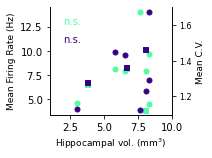

In [11]:
fig, ax1 = plt.subplots(figsize = [2.2,2])
ax2 = ax1.twinx()

ax1.scatter(Volumes[M_idx], mean_FR[M_idx], s = 25, marker='s', color = sns.xkcd_rgb['sea green'])
ax2.scatter(Volumes[M_idx], mean_CV[M_idx], s = 25, marker='s', color = sns.xkcd_rgb['indigo'])

ax1.scatter(Volumes[F_idx], mean_FR[F_idx], s = 25, marker='o', color = sns.xkcd_rgb['sea green'])
ax2.scatter(Volumes[F_idx], mean_CV[F_idx], s = 25, marker='o', color = sns.xkcd_rgb['indigo'])

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Volumes, mean_FR)
print(f'FR vs Hipp Volume p = {p_value}')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Volumes, mean_CV)
print(f'CV vs Hipp Volume p = {p_value}')

plt.xlim([1,10])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
ax1.set_xlabel('Hippocampal vol. (mm$^3$)', fontsize = 9)
ax1.set_ylabel('Mean Firing Rate (Hz)', fontsize = 9)
ax2.set_ylabel('Mean C.V.', fontsize = 9)

plt.text(2,1.6,'n.s.', color=sns.xkcd_rgb['sea green'])
plt.text(2,1.5,'n.s.', color=sns.xkcd_rgb['indigo'])

sns.despine(top=True, right=False)

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_FR_and_CV_vs_HippVol.pdf', bbox_inches = "tight")
    
    

FR vs Ventricular Volume p = 0.47829809495434505
CV vs Ventricular Volume p = 0.31512832721717604


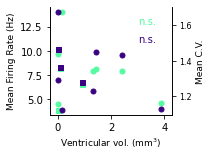

In [12]:
fig, ax1 = plt.subplots(figsize = [2.2,2])
ax2 = ax1.twinx()

ax1.scatter(Ventricles[M_idx], mean_FR[M_idx], s = 25, marker='s', color = sns.xkcd_rgb['sea green'])
ax2.scatter(Ventricles[M_idx], mean_CV[M_idx], s = 25, marker='s', color = sns.xkcd_rgb['indigo'])

ax1.scatter(Ventricles[F_idx], mean_FR[F_idx], s = 25, marker='o', color = sns.xkcd_rgb['sea green'])
ax2.scatter(Ventricles[F_idx], mean_CV[F_idx], s = 25, marker='o', color = sns.xkcd_rgb['indigo'])

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Ventricles, mean_FR)
print(f'FR vs Ventricular Volume p = {p_value}')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Ventricles, mean_CV)
print(f'CV vs Ventricular Volume p = {p_value}')

plt.xlim([-.3,4.3])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
ax1.set_xlabel('Ventricular vol. (mm$^3$)', fontsize = 9)
ax1.set_ylabel('Mean Firing Rate (Hz)', fontsize = 9)
ax2.set_ylabel('Mean C.V.', fontsize = 9)

plt.text(3,1.6,'n.s.', color=sns.xkcd_rgb['sea green'])
plt.text(3,1.5,'n.s.', color=sns.xkcd_rgb['indigo'])

sns.despine(top=True, right=False)

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_FR_and_CV_vs_VentrVol.pdf', bbox_inches = "tight")
    

FR vs AT8% p = 0.30608897562818765
CV vs AT8% p = 0.357602910000589


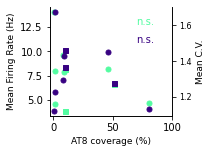

In [13]:
fig, ax1 = plt.subplots(figsize = [2.2,2])
ax2 = ax1.twinx()

ax1.scatter(ATs_james[M_idx], mean_FR[M_idx], s = 25, marker='s', color = sns.xkcd_rgb['sea green'])
ax2.scatter(ATs_james[M_idx], mean_CV[M_idx], s = 25, marker='s', color = sns.xkcd_rgb['indigo'])

ax1.scatter(ATs_james[F_idx], mean_FR[F_idx], s = 25, marker='o', color = sns.xkcd_rgb['sea green'])
ax2.scatter(ATs_james[F_idx], mean_CV[F_idx], s = 25, marker='o', color = sns.xkcd_rgb['indigo'])

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(ATs_james, mean_FR)
print(f'FR vs AT8% p = {p_value}')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(ATs_james, mean_CV)
print(f'CV vs AT8% p = {p_value}')

plt.xlim([-3,100])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
ax1.set_xlabel('AT8 coverage (%)', fontsize = 9)
ax1.set_ylabel('Mean Firing Rate (Hz)', fontsize = 9)
ax2.set_ylabel('Mean C.V.', fontsize = 9)

plt.text(70,1.6,'n.s.', color=sns.xkcd_rgb['sea green'])
plt.text(70,1.5,'n.s.', color=sns.xkcd_rgb['indigo'])

sns.despine(top=True, right=False)

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_FR_and_CV_vs_AT8.pdf', bbox_inches = "tight")
    

# correlation/entropy vs histology:

Correlation Magnitude vs Hipp Volume p = 0.22536584310214428
Correlation Entropy vs Hipp Volume p = 0.07080007408285756


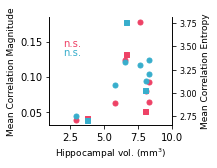

In [14]:
fig, ax1 = plt.subplots(figsize = [2.2,2])
ax2 = ax1.twinx()

corr_color = '#EE4266'
#entr_color = '#A7BED3'
entr_color = '#38AECC'

ax1.scatter(Volumes[M_idx], mean_correlation[M_idx], s = 25, marker='s', color = corr_color)
ax2.scatter(Volumes[M_idx], entropy[M_idx], s = 25, marker='s', color = entr_color)

ax1.scatter(Volumes[F_idx], mean_correlation[F_idx], s = 25, marker='o', color = corr_color)
ax2.scatter(Volumes[F_idx], entropy[F_idx], s = 25, marker='o', color = entr_color)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Volumes, mean_correlation)
print(f'Correlation Magnitude vs Hipp Volume p = {p_value}')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Volumes, entropy)
print(f'Correlation Entropy vs Hipp Volume p = {p_value}')

plt.xlim([1,10])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
ax1.set_xlabel('Hippocampal vol. (mm$^3$)', fontsize = 9)
ax1.set_ylabel('Mean Correlation Magnitude', fontsize = 9)
ax2.set_ylabel('Mean Correlation Entropy', fontsize = 9)

plt.text(2,3.5,'n.s.', color=corr_color)
plt.text(2,3.4,'n.s.', color=entr_color)

sns.despine(top=True, right=False)

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_correlation_and_entropy_vs_HippVol.pdf', bbox_inches = "tight")
    
    

Correlation Magnitude vs Ventricular Volume p = 0.39367639917444563
Correlation Entropy vs Ventricular Volume p = 0.169933585748722


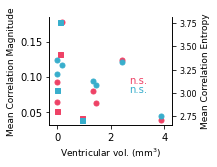

In [15]:
fig, ax1 = plt.subplots(figsize = [2.2,2])
ax2 = ax1.twinx()

ax1.scatter(Ventricles[M_idx], mean_correlation[M_idx], s = 25, marker='s', color = corr_color)
ax2.scatter(Ventricles[M_idx], entropy[M_idx], s = 25, marker='s', color = entr_color)

ax1.scatter(Ventricles[F_idx], mean_correlation[F_idx], s = 25, marker='o', color = corr_color)
ax2.scatter(Ventricles[F_idx], entropy[F_idx], s = 25, marker='o', color = entr_color)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Ventricles, mean_correlation)
print(f'Correlation Magnitude vs Ventricular Volume p = {p_value}')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Ventricles, entropy)
print(f'Correlation Entropy vs Ventricular Volume p = {p_value}')

plt.xlim([-.3,4.3])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
ax1.set_xlabel('Ventricular vol. (mm$^3$)', fontsize = 9)
ax1.set_ylabel('Mean Correlation Magnitude', fontsize = 9)
ax2.set_ylabel('Mean Correlation Entropy', fontsize = 9)

plt.text(2.7,3.1,'n.s.', color=corr_color)
plt.text(2.7,3,'n.s.', color=entr_color)

sns.despine(top=True, right=False)

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_correlation_and_entropy_vs_VentVol.pdf', bbox_inches = "tight")
    
    

Correlation Magnitude vs AT8% p = 0.0646716975126466
Correlation Entropy vs AT8% p = 0.026314108793040306
Correlation Entropy vs AT8% r sq = 0.4801702897190272


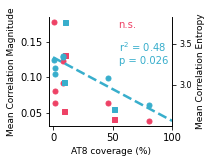

In [16]:
fig, ax1 = plt.subplots(figsize = [2.2,2])
ax2 = ax1.twinx()

ax1.scatter(ATs_james[M_idx], mean_correlation[M_idx], s = 25, marker='s', color = corr_color)
ax2.scatter(ATs_james[M_idx], entropy[M_idx], s = 25, marker='s', color = entr_color)

ax1.scatter(ATs_james[F_idx], mean_correlation[F_idx], s = 25, marker='o', color = corr_color)
ax2.scatter(ATs_james[F_idx], entropy[F_idx], s = 25, marker='o', color = entr_color)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(ATs_james, mean_correlation)
print(f'Correlation Magnitude vs AT8% p = {p_value}')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(ATs_james, entropy)
print(f'Correlation Entropy vs AT8% p = {p_value}')
print(f'Correlation Entropy vs AT8% r sq = {r_value**2}')

plt.xlim([-3,100])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
ax1.set_xlabel('AT8 coverage (%)', fontsize = 9)
ax1.set_ylabel('Mean Correlation Magnitude', fontsize = 9)
ax2.set_ylabel('Mean Correlation Entropy', fontsize = 9)


slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(ATs_james, entropy)
fitxs = np.arange(0, 100,.05)
fitys = slope*fitxs + intercept
plt.plot(fitxs, fitys, color = entr_color, linestyle = '--', linewidth=2.5)


plt.text(55,3.7,'n.s.', color=corr_color)
plt.text(55,3.4,'r$^2$ = 0.48', color=entr_color)
plt.text(55,3.25,'p = 0.026', color=entr_color)

sns.despine(top=True, right=False)

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_correlation_and_entropy_vs_AT8.pdf', bbox_inches = "tight")
    
    

In [41]:
SAVEFIGS = 1

In [ ]:
#53fca1
#380282


In [104]:
SAVEFIGS = 1

# near-critical vs histology:

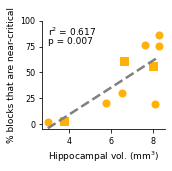

In [52]:
plt.figure(1, figsize = [2.2,2])
DCC_measure = nearcrit

plt.scatter(Volumes[M_idx], DCC_measure[M_idx],  s = 50, marker='s', color = sns.xkcd_rgb['saffron'])
plt.scatter(Volumes[F_idx], DCC_measure[F_idx], s = 50, marker='o', color = sns.xkcd_rgb['saffron'])

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Volumes, DCC_measure)
fitxs = np.arange(np.min(Volumes), np.max(Volumes),.05)
fitys = slope*fitxs + intercept
plt.plot(fitxs, fitys, color = 'grey', linestyle = '--', linewidth=2.5)
plt.text(3, 85, 'r$^2$ = ' + str(round(r_value**2,3)), fontsize=9)
plt.text(3, 78, 'p = ' + str(round(p_value,3)), fontsize=9)
plt.ylim([-5,100])
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.ylabel('% blocks that are near-critical', fontsize = 9)
plt.xlabel('Hippocampal vol. (mm$^3$)', fontsize = 9)

sns.despine()

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_nearcrit_vs_HippVol.pdf', bbox_inches = "tight")
    

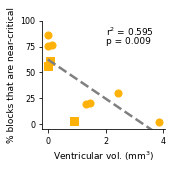

In [51]:
plt.figure(1, figsize = [2.2,2])

DCC_measure = nearcrit

plt.scatter(Ventricles[M_idx], DCC_measure[M_idx], s = 50, marker='s', color = sns.xkcd_rgb['saffron'])
plt.scatter(Ventricles[F_idx], DCC_measure[F_idx], s = 50, marker='o', color = sns.xkcd_rgb['saffron'])

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Ventricles, DCC_measure)
fitxs = np.arange(np.min(Ventricles), np.max(Ventricles),.05)
fitys = slope*fitxs + intercept
plt.plot(fitxs, fitys, color = 'grey', linestyle = '--', linewidth=2.5)
#plt.text(10, 6, 'n.s.', color = sns.xkcd_rgb['saffron'], fontsize=10)
plt.text(2, 85, 'r$^2$ = ' + str(round(r_value**2,3)), fontsize=9)
plt.text(2, 78, 'p = ' + str(round(p_value,3)), fontsize=9)
plt.ylim([-5,100])
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.ylabel('% blocks that are near-critical', fontsize = 9)
plt.xlabel('Ventricular vol. (mm$^3$)', fontsize = 9)

sns.despine()

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_nearcrit_vs_VentrVol.pdf', bbox_inches = "tight")
    
    

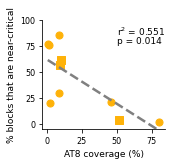

In [50]:
plt.figure(1, figsize = [2.2,2])

DCC_measure = nearcrit

plt.scatter(ATs_james[M_idx], DCC_measure[M_idx], s = 50, marker='s', color = sns.xkcd_rgb['saffron'])
plt.scatter(ATs_james[F_idx], DCC_measure[F_idx], s = 50, marker='o', color = sns.xkcd_rgb['saffron'])

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(ATs_james, DCC_measure)
fitxs = np.arange(np.min(ATs_james), np.max(ATs_james),.05)
fitys = slope*fitxs + intercept
plt.plot(fitxs, fitys, color = 'grey', linestyle = '--', linewidth=2.5)
#plt.text(10, 6, 'n.s.', color = sns.xkcd_rgb['saffron'], fontsize=10)
plt.text(50, 85, 'r$^2$ = ' + str(round(r_value**2,3)), fontsize=9)
plt.text(50, 78, 'p = ' + str(round(p_value,3)), fontsize=9)
plt.ylim([-5,100])
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.ylabel('% blocks that are near-critical', fontsize = 9)
plt.xlabel('AT8 coverage (%)', fontsize = 9)

sns.despine()

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig6_figures/{today}_nearcrit_vs_AT8.pdf', bbox_inches = "tight")
    
    